In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../Session_04/sample_data.csv', parse_dates = ['timestamp']) # dùng parse_dates để chuyển đổi thời gian từ dạng string => time

In [62]:
df.timestamp.iloc[0]

Timestamp('2018-05-16 17:33:18.350333')

In [3]:
df['account_type'] = 'New' #Tao 1 column với giá trị 'New' có tên là account_type

In [59]:
df

,account_id,ad_id,event_name,timestamp,platform,category_name,region_name,condition_ad_name,price,time,account_type
0,2.496840e+17,-1.592654e+17,order,2018-05-16 17:33:18.350333,on_behalf,Cars,Đông Bắc Bộ,Mới,2.670000e+08,2018-05-16 17:33:18.350333,New
1,2.753457e+18,-6.487219e+18,order,2018-05-04 16:03:08.099983,on_behalf,Cars,Đông Bắc Bộ,Mới,3.990000e+08,2018-05-04 16:03:08.099983,New
2,2.753457e+18,-6.487219e+18,order,2018-05-03 15:13:42.447070,on_behalf,Cars,Đông Bắc Bộ,Mới,3.990000e+08,2018-05-03 15:13:42.447070,New
3,-4.397739e+18,4.054922e+18,order,2018-05-23 11:15:25.932663,on_behalf,Cars,Hà Nội,Mới,7.050000e+08,2018-05-23 11:15:25.932663,Old
4,-8.143275e+18,3.202539e+18,order,2018-05-15 17:53:01.634923,on_behalf,Cars,Hà Nội,Mới,6.960000e+08,2018-05-15 17:53:01.634923,New
...,...,...,...,...,...,...,...,...,...,...,...
5263295,-1.208871e+18,-4.114509e+18,order,2018-02-21 17:03:44.234105,desktop_web,"TV, Speakers, MP3 players",Hải Phòng Nam Định Thái Bình,NaN,5.500000e+05,2018-02-21 17:03:44.234105,New
5263296,9.118533e+18,2.103537e+18,order,2018-12-06 14:22:24.461284,desktop_web,PTY-Houses,Hải Phòng Nam Định Thái Bình,NaN,1.800000e+09,2018-12-06 14:22:24.461284,New
5263297,1.718508e+18,-1.564017e+18,order,2018-04-07 09:22:23.395420,desktop_web,"Specialized equipments, Agricultural breeds",Hải Phòng Nam Định Thái Bình,Mới,4.900000e+05,2018-04-07 09:22:23.395420,New
sort_time_value[i],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,New


# Solution for Task 1

In [4]:
# Solution:
df.sort_values(by = ['account_id', 'timestamp'], ascending = [True,False], inplace = True)

In [5]:
account_type  = lambda x: x.timestamp - x.timestamp.shift(-1)
account_type = df.groupby('account_id').apply(account_type)
days = account_type.to_frame().reset_index()['timestamp'].dt.days
df['account_type'] = np.where(days > 30, 'new', np.where(days<30, 'old','new'))

In [33]:
df.head()

,account_id,ad_id,event_name,timestamp,platform,category_name,region_name,condition_ad_name,price,account_type,month,Week
1406849,-9223336493830730905,3088179676471213070,insert,2018-01-21 17:21:35.069056,unknown,Mobile Phones,Hà Nội,NaN,5900000.0,old,1,03
1343878,-9223336493830730905,-5279128860130030977,insert,2018-01-03 17:00:08.497463,unknown,Tablets,Hà Nội,NaN,2470000.0,old,1,00
1408567,-9223336493830730905,-2462399768676748292,insert,2018-01-02 11:21:05.008605,unknown,Mobile Phones,Hà Nội,NaN,4700000.0,new,1,00
2560039,-9223105201273952408,-177089586640378831,insert,2018-06-13 10:28:39.587018,unknown,Cars,Tp Hồ Chí Minh,Đã sử dụng,300000000.0,new,6,23
3168169,-9223105201273952408,3166031885300745638,insert,2018-04-28 09:04:42.139687,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,1000000.0,old,4,16


Dựa vào thông tin account_type vẽ biểu đồ thể hiện sự thay đổi, số account cũ và mới theo tháng, theo
tuần, theo ngày (nếu số ngày quá nhiều có thể bỏ qua để hình vẽ được gọn gàng).


<AxesSubplot:xlabel='Week', ylabel='account_type'>

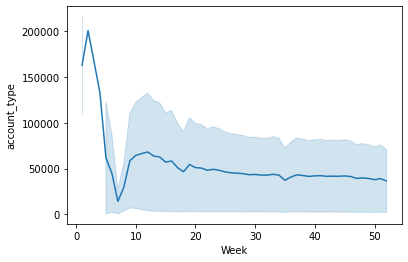

In [124]:
# Vẽ biểu đồ theo tuần
sns.lineplot(data = df.groupby(['Week', 'account_type']).account_type.count(), x = 'Week', y =df.groupby(['Week', 'account_type']).account_type.count())

In [44]:
df['month'] = df.timestamp.dt.month
df['Week'] = df.timestamp.dt.isocalendar().week
df['day'] = df.timestamp.dt.dayofyear

In [55]:
df.head()

,account_id,ad_id,event_name,timestamp,platform,category_name,region_name,condition_ad_name,price,account_type,month,Week,day
1406849,-9223336493830730905,3088179676471213070,insert,2018-01-21 17:21:35.069056,unknown,Mobile Phones,Hà Nội,NaN,5900000.0,old,1,3,21
1343878,-9223336493830730905,-5279128860130030977,insert,2018-01-03 17:00:08.497463,unknown,Tablets,Hà Nội,NaN,2470000.0,old,1,1,3
1408567,-9223336493830730905,-2462399768676748292,insert,2018-01-02 11:21:05.008605,unknown,Mobile Phones,Hà Nội,NaN,4700000.0,new,1,1,2
2560039,-9223105201273952408,-177089586640378831,insert,2018-06-13 10:28:39.587018,unknown,Cars,Tp Hồ Chí Minh,Đã sử dụng,300000000.0,new,6,24,164
3168169,-9223105201273952408,3166031885300745638,insert,2018-04-28 09:04:42.139687,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,1000000.0,old,4,17,118


<AxesSubplot:xlabel='Week', ylabel='account_type'>

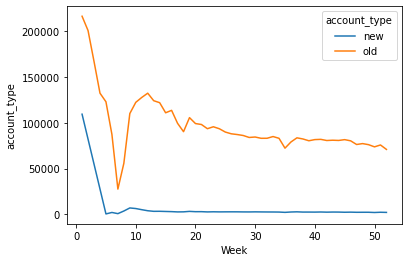

In [95]:
# Vẽ biểu đồ theo tuần
sns.lineplot(data = df.groupby(['Week', 'account_type']).account_type.count(), x = 'Week', y =df.groupby(['Week', 'account_type']).account_type.count(), hue ='account_type')

<AxesSubplot:xlabel='month', ylabel='account_type'>

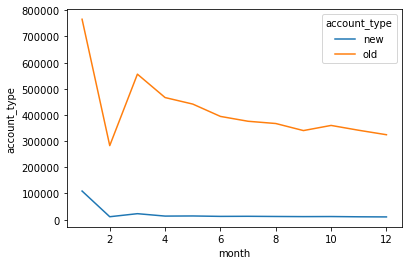

In [96]:
# Vẽ biểu đồ theo tháng
sns.lineplot(data = df.groupby(['month', 'account_type']).account_type.count(), x = 'month', y =df.groupby(['month', 'account_type']).account_type.count(), hue ='account_type')

<AxesSubplot:xlabel='day', ylabel='account_type'>

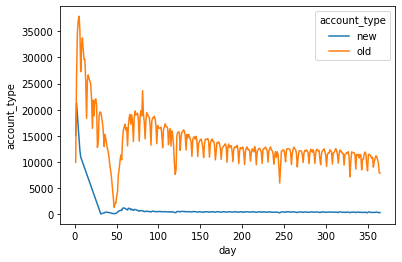

In [97]:
# Vẽ biểu đồ theo ngày
sns.lineplot(data = df.groupby(['day', 'account_type']).account_type.count(), x = 'day', y =df.groupby(['day', 'account_type']).account_type.count(), hue ='account_type')

In [64]:
df.head()

,account_id,ad_id,event_name,timestamp,platform,category_name,region_name,condition_ad_name,price,account_type,month,Week,day
1406849,-9223336493830730905,3088179676471213070,insert,2018-01-21 17:21:35.069056,unknown,Mobile Phones,Hà Nội,NaN,5900000.0,old,1,3,21
1343878,-9223336493830730905,-5279128860130030977,insert,2018-01-03 17:00:08.497463,unknown,Tablets,Hà Nội,NaN,2470000.0,old,1,1,3
1408567,-9223336493830730905,-2462399768676748292,insert,2018-01-02 11:21:05.008605,unknown,Mobile Phones,Hà Nội,NaN,4700000.0,new,1,1,2
2560039,-9223105201273952408,-177089586640378831,insert,2018-06-13 10:28:39.587018,unknown,Cars,Tp Hồ Chí Minh,Đã sử dụng,300000000.0,new,6,24,164
3168169,-9223105201273952408,3166031885300745638,insert,2018-04-28 09:04:42.139687,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,1000000.0,old,4,17,118


In [82]:
df.groupby(['Week', 'account_type']).account_type.count().to_frame()

account_type
Week account_type              
1    new                 109275
     old                 216003
2    old                 200414
3    old                 166791
4    old                 132187
...                         ...
50   old                  73687
51   new                   2421
     old                  75745
52   new                   2267
     old                  70902

[101 rows x 1 columns]

Task 2:
Làm lại task 1, nhưng theo dõi số account cũ mới theo từng category_name. Để có dữ liệu tốt, nên chọn
10 ngành hàng phổ biến (có số lượng account_id tương tác nhiều)
Lựa chọn biểu đồ để thể hiện sự thay đổi của số account cũ/mới theo ngành hàng từ đó phát hiện ra ngành
hàng nào có tính bão hòa (số account cũ/mới ổn định), ngành hàng nào có khả năng thu hút thêm được
nhiều account mới.

In [114]:
top10_cate = df.category_name.value_counts().head(10).index[0:10]

In [119]:
top10_cate = list(top10_cate)
top10_cate

['PTY-Houses',
 'Mobile Phones',
 'Motorbikes',
 'PTY-Land',
 'Computers, Laptops',
 'TV, Speakers, MP3 players',
 'Fridge',
 'Cars',
 'Rooster',
 'PTY-Office, Commercial Properties']

In [123]:
df2 = df.query('category_name == @top10_cate')
df2.groupby(['month','category_name', 'account_type']).account_type.count().to_frame()

account_type
month category_name                     account_type              
1     Cars                              new                   2328
                                        old                  12019
      Computers, Laptops                new                   2560
                                        old                  36969
      Fridge                            new                   1670
...                                                            ...
12    PTY-Office, Commercial Properties old                   5083
      Rooster                           new                    273
                                        old                   9177
      TV, Speakers, MP3 players         new                    595
                                        old                  25030

[240 rows x 1 columns]

<AxesSubplot:xlabel='month', ylabel='account_type'>

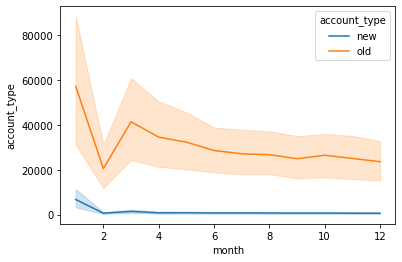

In [141]:
# Vẽ biểu đồ theo tháng
sns.lineplot(data = df2.groupby(['month','category_name', 'account_type']).account_type.count(), x = 'month', y = df2.groupby(['month','category_name', 'account_type']).account_type.count(), hue ='account_type')

<AxesSubplot:xlabel='month', ylabel='account_type'>

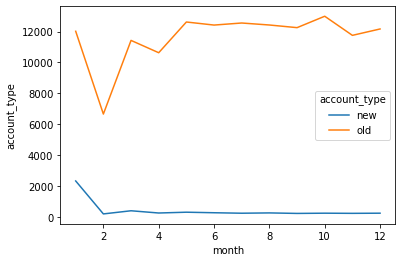

In [155]:
# Vẽ biểu đồ Cars theo tháng
df_cars = df[df.category_name == 'Cars'].groupby(['month','account_type']).account_type.count()
sns.lineplot(data = df_cars, x = 'month', y = df_cars, hue ='account_type')

<AxesSubplot:xlabel='Week', ylabel='account_type'>

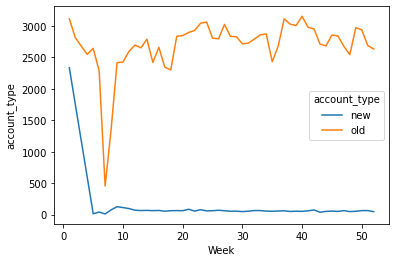

In [156]:
# Vẽ biểu đồ Cars theo tuần
df_cars = df[df.category_name == 'Cars'].groupby(['Week','account_type']).account_type.count()
sns.lineplot(data = df_cars, x = 'Week', y = df_cars, hue ='account_type')

<AxesSubplot:xlabel='day', ylabel='account_type'>

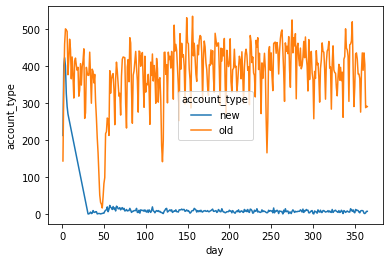

In [63]:
# Vẽ biểu đồ Cars theo ngày
df_cars = df[df.category_name == 'Cars'].groupby(['day','account_type']).account_type.count()
sns.lineplot(data = df_cars, x = 'day', y = df_cars, hue ='account_type')

Task 3: Dùng biểu đồ kiểm chứng mối tương quan giữa giá của một ad_id và số lần đăng trong năm.
Với mỗi ad_id sẽ có một giá (price), và có thể ad_id xuất hiện nhiều lần trong data do phải đăng bán
nhiều lần vì chưa bán được.
Ta muốn kiểm chứng bằng dữ liệu, các sản phẩm có giá cao sẽ khó bán (ad_id xuất hiện nhiều lần)


In [34]:
df.groupby(['ad_id']).agg({"ad_id":"count"})

,ad_id
ad_id,
-9223371703641957917,1
-9223368329177220020,2
-9223367969235967373,1
-9223364108367044886,1
-9223355714160016423,1
...,...
9223356863512511301,1
9223357848317221243,2
9223358638847625643,1


In [78]:
df.groupby('ad_id').price

In [89]:
df.groupby('ad_id').price.unique()

ad_id
-9223371703641957917        [1200000.0]
-9223368329177220020       [16000000.0]
-9223367969235967373       [50000000.0]
-9223364108367044886    [27000000000.0]
-9223355714160016423        [1800000.0]
                             ...       
 9223356863512511301         [300000.0]
 9223357848317221243       [88600000.0]
 9223358638847625643       [12345000.0]
 9223367560943472510        [4000000.0]
 9223369861305511472        [3800000.0]
Name: price, Length: 3678082, dtype: object

In [92]:
pd.concat(df.groupby(['ad_id']).agg({"ad_id":"count"}), df.groupby('ad_id').price.unique())

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"